# Model 3: Improve model with a better optimizer
In this notebook, we keep on improving models 1 and 2, by playing with the hyperparameters, especially we are changing the optimizer from SGD to Adam.


## Load modules

In [1]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from keras.callbacks import EarlyStopping, LearningRateScheduler

import helpers
from datetime import datetime
def timestamp():
    return datetime.now().strftime('%y%m%d_%H%M')

## Load dataset

In [2]:
# Load CIFAR-10 dataset
x_train, y_train, x_test, y_test = helpers.load_dataset()

Loading CIFAR10 dataset


## Model 3 architecture

Let's recompile the same model with Adam, which is ususally prefered over SGD for image classification. Reasons:

- Adaptive Learning Rate: Adam adapts the learning rate for each parameter, making it more efficient in handling sparse gradients or noisy data, while SGD uses a fixed learning rate unless momentum or schedules are applied.

- Faster Convergence: Adam combines momentum and adaptive learning rates, helping it converge faster and more efficiently, especially in complex models.

- Less Hyperparameter Tuning: Adam works well with default settings, whereas SGD typically requires more careful tuning of learning rates and momentum.



In [5]:
input_shape = x_train.shape[1:]

model = Sequential()
model.add(Input(shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [4]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# implement callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
lr_schedule = LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch / 20))

# train model
history = model.fit(
    x_train, y_train, 
    batch_size=512, 
    epochs=15, 
    validation_split=0.1,
    callbacks=[lr_schedule, early_stopping]
)

# save model
model_path = f"models/model3_{timestamp()}.keras"
model.save(model_path)

Epoch 1/15


2024-09-27 10:44:34.476911: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-09-27 10:44:38.087947: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f316c028ab0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-27 10:44:38.088298: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2024-09-27 10:44:38.112670: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1727433878.245859     130 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


88/88 [==============================] - 14s 44ms/step - loss: 1.8035 - accuracy: 0.4371 - val_loss: 3.3810 - val_accuracy: 0.0958 - lr: 0.0010
Epoch 2/15
88/88 [==============================] - 2s 20ms/step - loss: 1.0933 - accuracy: 0.6075 - val_loss: 3.9492 - val_accuracy: 0.1382 - lr: 8.9125e-04
Epoch 3/15
88/88 [==============================] - 2s 20ms/step - loss: 0.8133 - accuracy: 0.7133 - val_loss: 3.7537 - val_accuracy: 0.1140 - lr: 7.9433e-04
Epoch 4/15
88/88 [==============================] - 2s 20ms/step - loss: 0.6095 - accuracy: 0.7868 - val_loss: 3.2239 - val_accuracy: 0.1868 - lr: 7.0795e-04
Epoch 5/15
88/88 [==============================] - 2s 20ms/step - loss: 0.4578 - accuracy: 0.8435 - val_loss: 2.3548 - val_accuracy: 0.3538 - lr: 6.3096e-04
Epoch 6/15
88/88 [==============================] - 2s 20ms/step - loss: 0.3209 - accuracy: 0.8924 - val_loss: 1.3833 - val_accuracy: 0.5622 - lr: 5.6234e-04
Epoch 7/15
88/88 [==============================] - 2s 20ms/step -

313/313 [==============================] - 1s 2ms/step
Model Loss: 0.7780702114105225
Model Accuracy: 0.8144000172615051
Precision: 0.8135652673377615
Recall: 0.8144
F1-Score: 0.8138305192602258
Accuracy Score: 0.8144


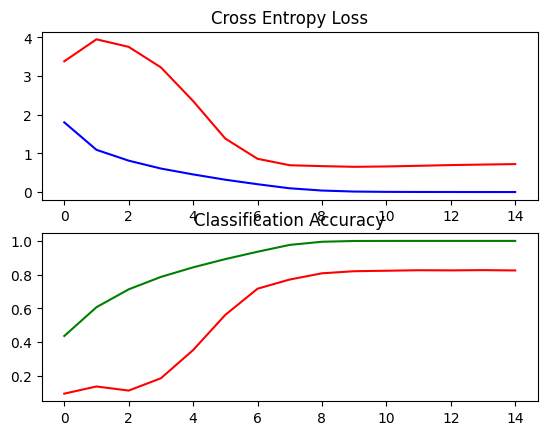

313/313 [==============================] - 1s 2ms/step


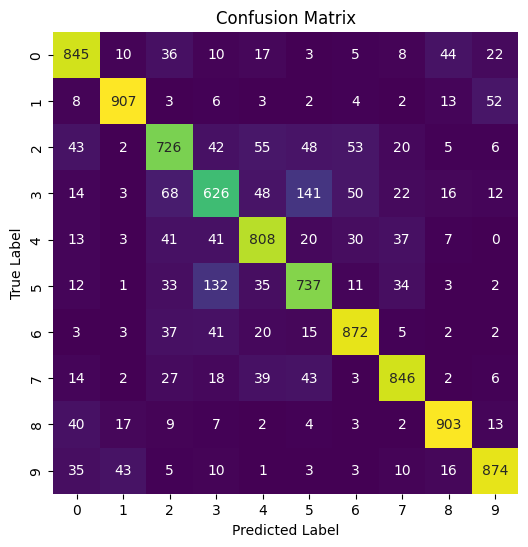

In [5]:
# plot results
helpers.evaluate_model(model, x_test, y_test)
helpers.plot_model_history(history)
helpers.plot_confusion_matrix(model, x_test, y_test)

## Conclusion
Over 15 epochs, we managed to gain 13% test accuracy just by changing the optimizer to Adam and implementing a LearningRateScheduler.